**<h1>Assignment 3 - NN & SVM Comparison</h1>**

**<h4>Importing libraries</h4>**

In [0]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


**Importing dataset**

In [0]:
df = pd.read_csv('Gaurav Singh - Data_Big_Project.txt', sep="\t", header=None)

In [120]:
df

,0,1,2
0,7.000142,3.646796,1
1,5.494838,1.583863,1
2,9.555408,7.090860,2
3,3.304367,8.659993,-1
4,10.169349,9.631713,-2
...,...,...,...
39995,5.920806,9.501930,-1
39996,9.939367,4.923146,2
39997,3.933472,5.505222,1
39998,6.806789,10.127456,-1


**Conclusion :** Dataset has two features, let them be **x** and **y**. **The dataset has 40000 entries such entries**

**Labelling the three columns as x, y, class for first feature(0), second feature(1) and target(2) respectively.**

In [121]:
dataset = df.values
dataset

array([[ 7.00014237,  3.64679564,  1.        ],
       [ 5.49483838,  1.58386313,  1.        ],
       [ 9.55540762,  7.09086002,  2.        ],
       ...,
       [ 3.93347186,  5.50522196,  1.        ],
       [ 6.80678858, 10.12745612, -1.        ],
       [ 3.67345867,  4.22588908,  1.        ]])

In [122]:
df.shape

(40000, 3)

In [123]:
dataset.shape

(40000, 3)

In [124]:
df.head()

,0,1,2
0,7.000142,3.646796,1
1,5.494838,1.583863,1
2,9.555408,7.090860,2
3,3.304367,8.659993,-1
4,10.169349,9.631713,-2


**Given :** Please note that the last column of the attached data has the target (label) information. This label has no physical significance. You may change it at will provided you do it consistently across the board.

In [0]:
df.columns = ["x", "y", "class"]

In [0]:
df["class"] = df["class"].replace(1, "class A")
df["class"] = df["class"].replace(-1, "class B")
df["class"] = df["class"].replace(2, "class C")
df["class"] = df["class"].replace(-2, "class D")

**Number of unique classes.**

In [127]:
df["class"].unique()

array(['class A', 'class C', 'class B', 'class D'], dtype=object)

In [128]:
df.head()

,x,y,class
0,7.000142,3.646796,class A
1,5.494838,1.583863,class A
2,9.555408,7.090860,class C
3,3.304367,8.659993,class B
4,10.169349,9.631713,class D


In [129]:
df.shape

(40000, 3)

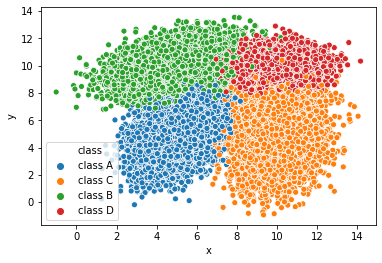

In [130]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.scatterplot(x="x", y="y", hue="class", data=df)

**<h2>Neural Network</h2>**

**Creating a neural network (of an appropriate architecture) to classify the samples.**

*   The architecture of the Neural Network created has 1 hidden layer with 16 nodes and an output layer with 4 nodes (for 4 unique values in the dataset target values). 




In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [0]:
df_enc = df

**Creating dummies :**

In [0]:
df_enc = pd.get_dummies(df, columns=["class"]) 

In [0]:
X = df_enc.iloc[:, 0:2]
Y = df_enc.iloc[:, 2:]

Using 0 to 8000 entries to train and rest upto 40000 entries for testing

In [0]:
X_train_NN=df_enc.iloc[8000:, 0:2]
X_test_NN=df_enc.iloc[0:8000, 0:2]
y_train_NN=df_enc.iloc[8000:40000, 2:]
y_test_NN=df_enc.iloc[0:8000, 2:]

*   Used **mean-square-error** as loss function. 
*   Used **stochastic gradient descent** as optimizer.


In [0]:
model.add(Dense(units=128, activation='relu', input_dim=2))
model.add(Dense(units=4, activation='softmax'))
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

In [137]:
#The fit() method on a Keras Model returns a History object
history = model.fit(X_train_NN, y_train_NN, epochs=100, validation_data = (X_test_NN, y_test_NN), batch_size=32)

Train on 32000 samples, validate on 8000 samples
Epoch 1/100
32000/32000 [==============================] - 1s 37us/step - loss: 0.1039 - accuracy: 0.6984 - val_loss: 0.0835 - val_accuracy: 0.7222
Epoch 2/100
32000/32000 [==============================] - 1s 36us/step - loss: 0.0788 - accuracy: 0.7219 - val_loss: 0.0736 - val_accuracy: 0.7495
Epoch 3/100
32000/32000 [==============================] - 1s 35us/step - loss: 0.0711 - accuracy: 0.7703 - val_loss: 0.0668 - val_accuracy: 0.8099
Epoch 4/100
32000/32000 [==============================] - 1s 35us/step - loss: 0.0647 - accuracy: 0.8418 - val_loss: 0.0608 - val_accuracy: 0.8493
Epoch 5/100
32000/32000 [==============================] - 1s 35us/step - loss: 0.0588 - accuracy: 0.8836 - val_loss: 0.0550 - val_accuracy: 0.8866
Epoch 6/100
32000/32000 [==============================] - 1s 35us/step - loss: 0.0531 - accuracy: 0.9049 - val_loss: 0.0492 - val_accuracy: 0.9179
Epoch 7/100
32000/32000 [==============================] - 1s 3

In [0]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [0]:
# from IPython.display import SVG
# from keras.utils import model_to_dot

In [0]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
# # Plot training & validation accuracy values
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [0]:
classes = model.predict(X_test_NN, batch_size=128)

In [0]:
predict = np.zeros((8000))  
for i in range(0,8000):
    predict[i] = np.argmax(classes[i])

In [0]:
pred_df = pd.concat([X_test_NN, pd.Series(predict)], axis=1)

In [0]:
pred_df.columns = ["x", "y", "class"]

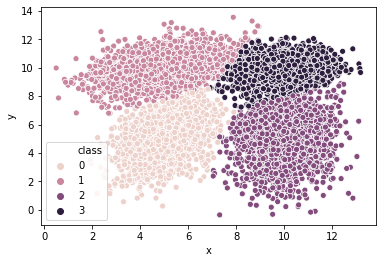

In [156]:
sns.scatterplot(x="x", y="y", hue="class", data=pred_df)

**<h3>Support Vector Machine</h3>**


*   Used multi-class SVM approach to perform the classification.
*   With SVM, compared both one-one and one-rest strategies. 
*   Also did the timing test between these two schemes.


**<h4>Linear SVC</h4>**


**In a linear SVC, the algorithm assumes linear separability for each data point, and simply seeks to maximize the distance between the plane and the point. (one vs rest approach)**

In [0]:
X_SVM = df.iloc[:, 0:2]
y_SVM = df.iloc[:, 2]
X_train_SVM=df.iloc[8000:, 0:2]
X_test_SVM=df.iloc[0:8000, 0:2]
y_train_SVM=df.iloc[8000:, 2]
y_test_SVM=df.iloc[0:8000, 2]

In [158]:
start = time.time()
clf = svm.LinearSVC(C=1.0)
clf.fit(X_train_SVM, y_train_SVM)
finish = time.time()
print('Time (one - rest approach):', {finish - start})

Time (one - rest approach): {2.7998199462890625}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
preds_linearSVC=clf.predict(X_test_SVM)

In [160]:
confusion_matrix(y_test_SVM, preds_linearSVC) 

array([[1924,   53,   17,    1],
       [   7, 1945,    0,   37],
       [   5,    0, 1898,   72],
       [   0,   24,    6, 2011]])

In [161]:
accuracy_score(y_test_SVM, preds_linearSVC, normalize=True, sample_weight=None)

0.97225

In [0]:
pred_linearSVC_df=pd.concat([X_test_SVM, pd.Series(preds_linearSVC)], axis=1)
pred_linearSVC_df.columns = ["x", "y", "class"]

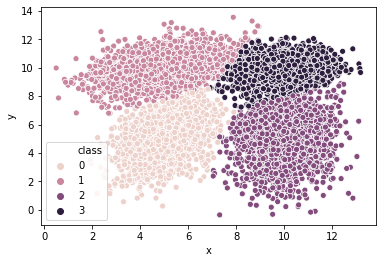

In [163]:
sns.scatterplot(x="x", y="y", hue="class", data=pred_df)

**<h3> Support Vector Machine </h3>**

**<h3>One-One strategy</h3>**


In [0]:
X_train_SVC=df.iloc[8000:, 0:2]
X_test_SVC=df.iloc[0:8000, 0:2]
y_train_SVC=df.iloc[8000:, 2]
y_test_SVC=df.iloc[0:8000, 2]
X_small = df.iloc[:10000, :2]
Y_small = df.iloc[:10000, 2]

In [165]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()
for each in sigma:
    for each_c in C:
        X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, Y_small, test_size=0.2)
        clf = svm.SVC(kernel='rbf', gamma = 1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        clf.fit(X_train_small, y_train_small)
        pred_small=clf.predict(X_test_small)
        print("Accuracy is ", accuracy_score(y_test_small, pred_small, normalize=True, sample_weight=None), "on sigma = ",  each, "and C = ", each_c)

Accuracy is  0.2505 on sigma =  0.01 and C =  0.01
Accuracy is  0.247 on sigma =  0.01 and C =  0.03
Accuracy is  0.2365 on sigma =  0.01 and C =  0.1
Accuracy is  0.2525 on sigma =  0.01 and C =  0.3
Accuracy is  0.48 on sigma =  0.01 and C =  1
Accuracy is  0.4995 on sigma =  0.01 and C =  3
Accuracy is  0.5215 on sigma =  0.01 and C =  10
Accuracy is  0.5115 on sigma =  0.01 and C =  30
Accuracy is  0.247 on sigma =  0.03 and C =  0.01
Accuracy is  0.2505 on sigma =  0.03 and C =  0.03
Accuracy is  0.2495 on sigma =  0.03 and C =  0.1
Accuracy is  0.497 on sigma =  0.03 and C =  0.3
Accuracy is  0.8795 on sigma =  0.03 and C =  1
Accuracy is  0.834 on sigma =  0.03 and C =  3
Accuracy is  0.843 on sigma =  0.03 and C =  10
Accuracy is  0.8615 on sigma =  0.03 and C =  30
Accuracy is  0.2505 on sigma =  0.1 and C =  0.01
Accuracy is  0.3115 on sigma =  0.1 and C =  0.03
Accuracy is  0.918 on sigma =  0.1 and C =  0.1
Accuracy is  0.948 on sigma =  0.1 and C =  0.3
Accuracy is  0.9585

In [166]:
start = time.time()
sigma= 1
gamma = 1/(2*(sigma**2))
clf = svm.SVC(kernel='rbf', gamma=gamma, C=0.03, decision_function_shape='ovr')
clf.fit(X_train_SVC, y_train_SVC)
finish = time.time()
print('Time (one - one approach):', {finish - start})

Time (one - one approach): {5.3945066928863525}


In [0]:
preds_SVC=clf.predict(X_test_SVC)

In [168]:
accuracy_score(y_test_SVC, preds_SVC, normalize=True, sample_weight=None)

0.97525

In [171]:
#entry (i, j) will be the no of examples which were i and predicted as j.
#entries of kind (i, i), (correctly classified) are maximum in number.
confusion_matrix(y_test_SVC, preds_SVC)

array([[1942,   37,   15,    1],
       [  19, 1938,    0,   32],
       [   6,    0, 1925,   44],
       [   0,   28,   16, 1997]])

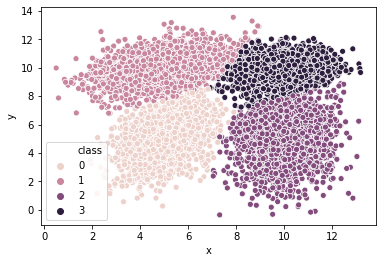

In [172]:
sns.scatterplot(x="x", y="y", hue="class", data=pred_df)

**<h3>Conclusions Drawn</h3>**

**Time Comparisons:**
One-One stratergy takes more time as compared to One-Rest stratergy.

*   One-Rest stratergy : 2.7998199462890625
*   One-One stratergy : 5.3945066928863525



**Accuracy :**
One-Rest stratergy is more accurate as compared to One-One stratergy.

*   One vs Rest stratergy : 97.225%
*   One vs One stratergy : 97.525%
